# 6.4 Machine Learning

#### 1. Importing libraries and data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Importing Data.
df = pd.read_csv(r'C:\Users\ProUser11\Desktop\DATA ANALYSIS\Tasks\Module 7\Analysis\02 Data\Prepared Data\ds_salaries ISO_A3.csv')

#### 2. Data cleaning

In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       ' salary ', 'salary_currency', ' salary_in_usd ', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
df.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,USA,0,USA,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,USA,0,USA,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CAN,0,CAN,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CAN,0,CAN,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,USA,0,USA,M


In [17]:
df.shape

(2584, 11)

In [18]:
# Check for missing values
df.isnull().sum()
# No missing values to handle

work_year             0
experience_level      0
employment_type       0
job_title             0
 salary               0
salary_currency       0
 salary_in_usd        0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [34]:
df.rename(columns={' salary_in_usd ': 'salary_in_usd'}, inplace=True)

In [35]:
df.rename(columns={' salary ': 'salary'}, inplace=True)

In [36]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M


In [37]:
#check for duplicates
dups = df.duplicated()

In [38]:
dups.shape
#no duplicates

(2584,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

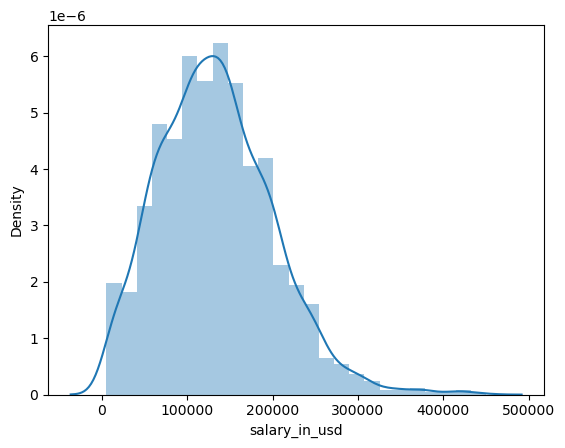

In [39]:
#Check for extreme values
sns.distplot(df['salary_in_usd'],bins = 25, kde = True)

In [40]:
df['salary_in_usd'].mean() # Check the mean

133409.28018575851

In [41]:
df['salary_in_usd'].median() # Check the median

130000.0

In [42]:
df['salary_in_usd'].max() # Check the max

450000

#### 3. Data prep for regression analysis

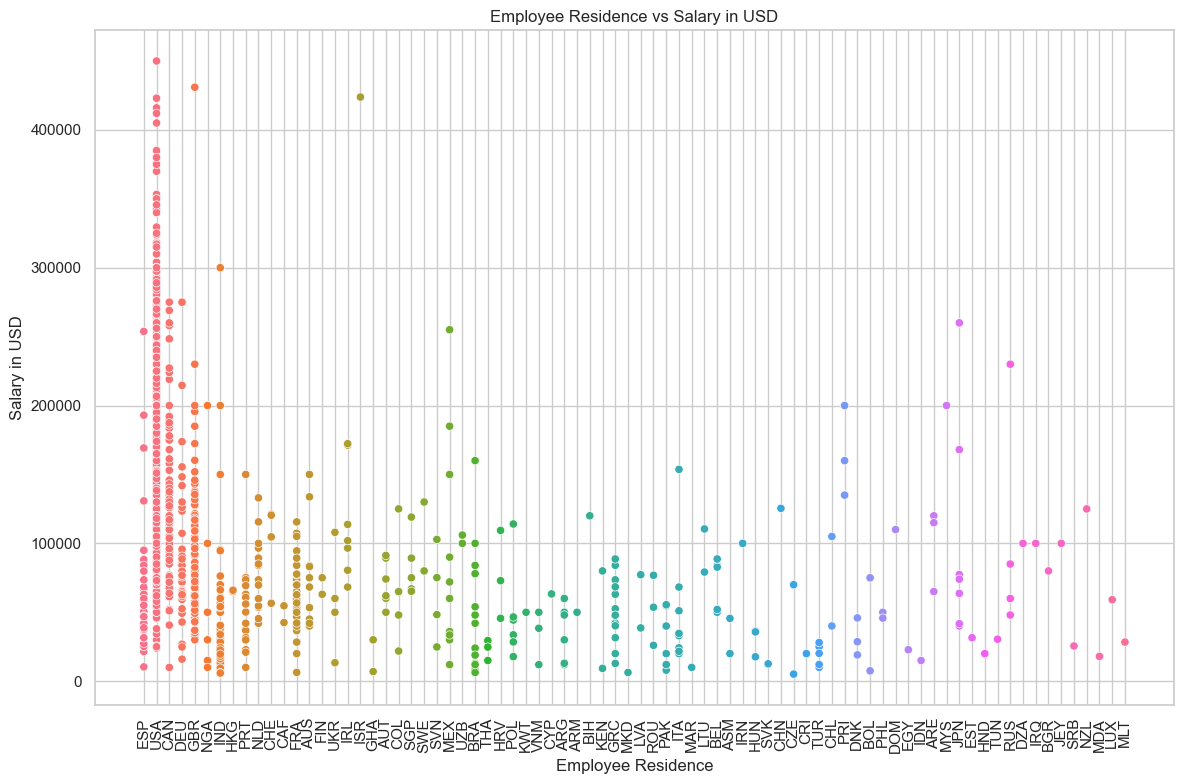

In [64]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.


# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
scatter_plot = sns.scatterplot(data=df, x='employee_residence', y='salary_in_usd', hue='employee_residence', legend=False)
plt.title('Employee Residence vs Salary in USD')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility


plt.tight_layout()
plt.show()


In [87]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'employee_residence' column
df['employee_residence_encoded'] = label_encoder.fit_transform(df['employee_residence'])

In [88]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['employee_residence_encoded'].values.reshape(-1,1)
y = df['salary_in_usd'].values.reshape(-1,1)

In [93]:
# Print List of countries and Numbers
encoded_country_df = df[['employee_residence', 'employee_residence_encoded']].drop_duplicates().sort_values('employee_residence_encoded')

print(encoded_country_df)


     employee_residence  employee_residence_encoded
2246                ARE                           0
992                 ARG                           1
1008                ARM                           2
1452                ASM                           3
202                 AUS                           4
...                 ...                         ...
1785                TUR                          73
285                 UKR                          74
1                   USA                          75
652                 UZB                          76
873                 VNM                          77

[78 rows x 2 columns]


In [95]:
#print "encoded_country_df"
print(encoded_country_df.to_string(index=False))

employee_residence  employee_residence_encoded
               ARE                           0
               ARG                           1
               ARM                           2
               ASM                           3
               AUS                           4
               AUT                           5
               BEL                           6
               BGR                           7
               BIH                           8
               BOL                           9
               BRA                          10
               CAF                          11
               CAN                          12
               CHE                          13
               CHL                          14
               CHN                          15
               COL                          16
               CRI                          17
               CYP                          18
               CZE                          19
             

In [97]:
X

array([[25],
       [75],
       [75],
       ...,
       [75],
       [75],
       [37]])

In [98]:
y

array([[ 85847],
       [ 30000],
       [ 25500],
       ...,
       [105000],
       [100000],
       [ 94665]], dtype=int64)

In [99]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [100]:
# Create a regression object.

regression = LinearRegression() 

In [101]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [102]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

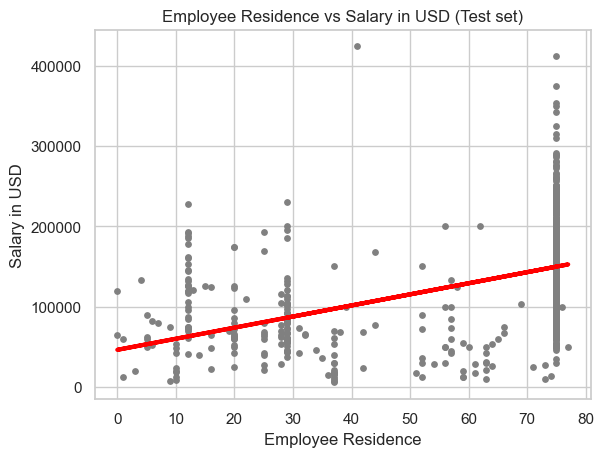

In [103]:
# Create the scatter plot using Seaborn
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Employee Residence vs Salary in USD (Test set)')
plot_test.xlabel('Employee Residence')
plot_test.ylabel('Salary in USD')
plot_test.show()

In [ ]:
# The Regression Line doesn't fit the the test set.

In [104]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [105]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1380.84235549]]
Mean squared error:  3549924457.946356
R2 score:  0.1797681212891541


In [106]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,103160,86339.810866
1,140400,149858.559218
2,240000,149858.559218
3,102000,149858.559218
4,26005,134669.293308
5,140000,149858.559218
6,184700,149858.559218
7,272000,149858.559218
8,87738,62865.490822
9,145000,149858.559218


#### Compare how the regression fits the training set.

In [107]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [108]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [109]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1380.84235549]]
Mean squared error:  3740423185.909471
R2 score:  0.1832411874606673


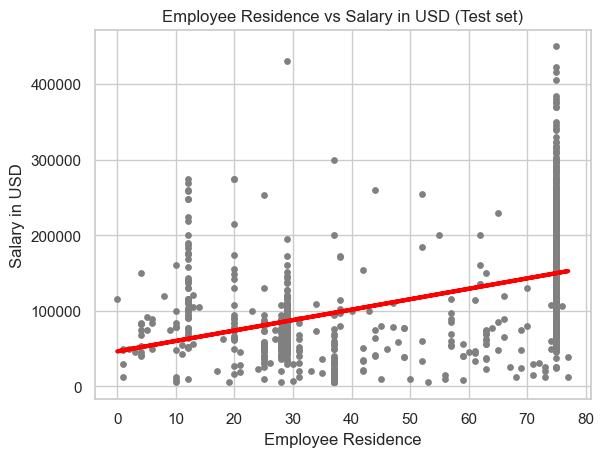

In [112]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Employee Residence vs Salary in USD (Test set)')
plot_test.xlabel('Employee Residence')
plot_test.ylabel('Salary in USD')
plot_test.show()

In [113]:
# This model clearly does not work for this DF. 
# Because certain countries have far more data than others, It causes the analysis to be skewed.